In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 no

(None, None)

In [4]:
train['source'] = 'train'
test['source'] = 'test'

In [5]:
data = pd.concat([train,test])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
source               981 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


In [7]:
data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

In [8]:
data['Gender'].fillna('Male',inplace=True)
data['Dependents'].fillna('0',inplace=True)
data['Married'].fillna('Yes',inplace=True)
data['Self_Employed'].fillna('No',inplace=True)
data['Credit_History'].fillna(1.0,inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)

In [9]:
# data_cd_null = data[data['Credit_History'].isnull()]
# data_cd = data[data['Credit_History'].notnull()]
# data_cd['Credit_History'].value_counts()
import numpy as np
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
#print(impute_grps.loc["Gender"].values[0])
print(impute_grps)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.527778
               Yes            138.714286
       Yes     No             136.903846
               Yes            282.250000
Male   No      No             126.601036
               Yes            163.960000
       Yes     No             150.286598
               Yes            164.041096


In [10]:
data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount            27
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
source                 0
dtype: int64

In [11]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#iterate only through rows with missing LoanAmount
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
    data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]

#Now check the #missing values again to confirm:
print(data.apply(num_missing, axis=0))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
source                 0
dtype: int64


In [12]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = pd.DataFrame(scaler.fit_transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]),columns=[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
# data.head()

In [13]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['Total_Income_log'] = np.log(data['Total_Income'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 16 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null float64
Dependents           981 non-null object
Education            981 non-null object
Gender               981 non-null object
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              981 non-null object
Property_Area        981 non-null object
Self_Employed        981 non-null object
source               981 non-null object
Total_Income         981 non-null float64
Total_Income_log     981 non-null float64
dtypes: float64(6), int64(1), object(9)
memory usage: 130.3+ KB


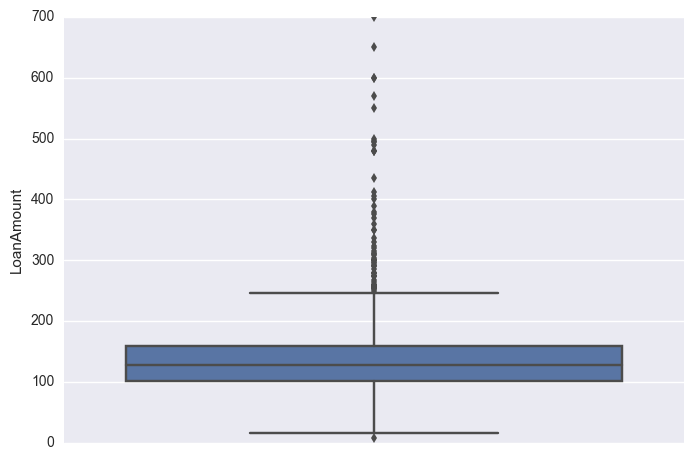

In [15]:
import seaborn as sns
sns.boxplot(y='LoanAmount',data=data)

In [16]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])

In [17]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source,Total_Income,Total_Income_log,LoanAmount_log
0,5849,0.0,1.0,0,Graduate,Male,126.601036,360.0,LP001002,Y,No,Urban,No,train,5849.0,8.674026,4.841041
1,4583,1508.0,1.0,1,Graduate,Male,128.000000,360.0,LP001003,N,Yes,Rural,No,train,6091.0,8.714568,4.852030
2,3000,0.0,1.0,0,Graduate,Male,66.000000,360.0,LP001005,Y,Yes,Urban,Yes,train,3000.0,8.006368,4.189655
3,2583,2358.0,1.0,0,Not Graduate,Male,120.000000,360.0,LP001006,Y,Yes,Urban,No,train,4941.0,8.505323,4.787492
4,6000,0.0,1.0,0,Graduate,Male,141.000000,360.0,LP001008,Y,No,Urban,No,train,6000.0,8.699515,4.948760


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Total_Income_log','LoanAmount_log','Loan_Amount_Term']] = pd.DataFrame(scaler.fit_transform(data[['Total_Income_log','LoanAmount_log','Loan_Amount_Term']]),columns=[['Total_Income_log','LoanAmount_log','Loan_Amount_Term']])
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source,Total_Income,Total_Income_log,LoanAmount_log
0,5849,0.0,1.0,0,Graduate,Male,126.601036,0.746835,LP001002,Y,No,Urban,No,train,5849.0,0.347590,0.607236
1,4583,1508.0,1.0,1,Graduate,Male,128.000000,0.746835,LP001003,N,Yes,Rural,No,train,6091.0,0.357654,0.609760
2,3000,0.0,1.0,0,Graduate,Male,66.000000,0.746835,LP001005,Y,Yes,Urban,Yes,train,3000.0,0.181853,0.457624
3,2583,2358.0,1.0,0,Not Graduate,Male,120.000000,0.746835,LP001006,Y,Yes,Urban,No,train,4941.0,0.305712,0.594936
4,6000,0.0,1.0,0,Graduate,Male,141.000000,0.746835,LP001008,Y,No,Urban,No,train,6000.0,0.353918,0.631977


In [19]:
data['EMI'] = data['LoanAmount_log']/data['Loan_Amount_Term']
data['Debit_Ratio'] = data['LoanAmount']/data['Total_Income']
data.drop(['ApplicantIncome','CoapplicantIncome','Total_Income'],axis=1,inplace=True)
data.drop('LoanAmount',axis=1,inplace=True)
data.head()

,Credit_History,Dependents,Education,Gender,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source,Total_Income_log,LoanAmount_log,EMI,Debit_Ratio
0,1.0,0,Graduate,Male,0.746835,LP001002,Y,No,Urban,No,train,0.347590,0.607236,0.813078,0.021645
1,1.0,1,Graduate,Male,0.746835,LP001003,N,Yes,Rural,No,train,0.357654,0.609760,0.816458,0.021015
2,1.0,0,Graduate,Male,0.746835,LP001005,Y,Yes,Urban,Yes,train,0.181853,0.457624,0.612751,0.022000
3,1.0,0,Not Graduate,Male,0.746835,LP001006,Y,Yes,Urban,No,train,0.305712,0.594936,0.796610,0.024287
4,1.0,0,Graduate,Male,0.746835,LP001008,Y,No,Urban,No,train,0.353918,0.631977,0.846206,0.023500


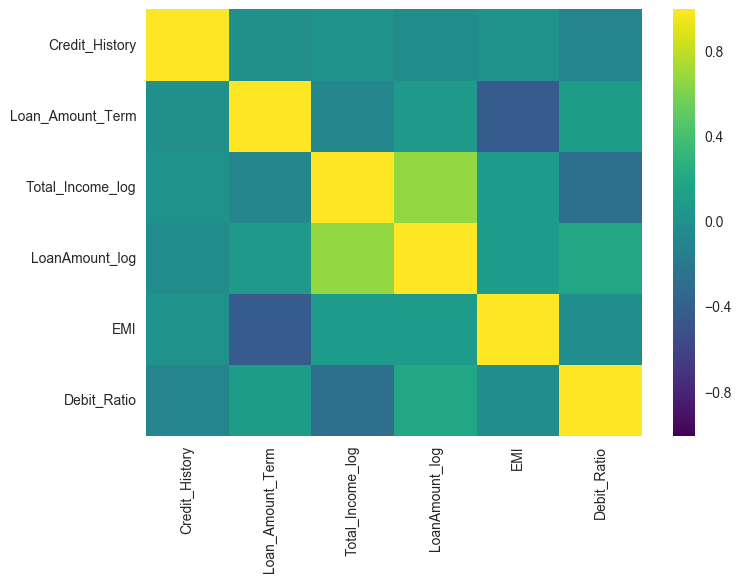

In [20]:
corr_temp = data.corr()
sns.heatmap(corr_temp,cmap='viridis')

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Dependents','Education','Gender','Married','Property_Area','Self_Employed']
# var_to_encode = ['Married','Dependents','Education','Property_Area']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

In [22]:
data.dtypes

Credit_History      float64
Dependents            int64
Education             int64
Gender                int64
Loan_Amount_Term    float64
Loan_ID              object
Loan_Status          object
Married               int64
Property_Area         int64
Self_Employed         int64
source               object
Total_Income_log    float64
LoanAmount_log      float64
EMI                 float64
Debit_Ratio         float64
dtype: object

In [23]:
data = pd.get_dummies(data,columns=var_to_encode)

In [24]:
data.head()

,Credit_History,Loan_Amount_Term,Loan_ID,Loan_Status,source,Total_Income_log,LoanAmount_log,EMI,Debit_Ratio,Dependents_0,...,Education_1,Gender_0,Gender_1,Married_0,Married_1,Property_Area_0,Property_Area_1,Property_Area_2,Self_Employed_0,Self_Employed_1
0,1.0,0.746835,LP001002,Y,train,0.347590,0.607236,0.813078,0.021645,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.746835,LP001003,N,train,0.357654,0.609760,0.816458,0.021015,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.746835,LP001005,Y,train,0.181853,0.457624,0.612751,0.022000,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.746835,LP001006,Y,train,0.305712,0.594936,0.796610,0.024287,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.746835,LP001008,Y,train,0.353918,0.631977,0.846206,0.023500,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [25]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']
train.drop('source',axis=1,inplace=True)
test.drop(['source','Loan_Status'],axis=1,inplace=True)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
train.describe()

,Credit_History,Loan_Amount_Term,Total_Income_log,LoanAmount_log,EMI,Debit_Ratio,Dependents_0,Dependents_1,Dependents_2,Dependents_3,...,Education_1,Gender_0,Gender_1,Married_0,Married_1,Property_Area_0,Property_Area_1,Property_Area_2,Self_Employed_0,Self_Employed_1
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.855049,0.708870,0.346445,0.611665,1.018205,0.023961,0.586319,0.166124,0.164495,0.083062,...,0.218241,0.182410,0.817590,0.346906,0.653094,0.291531,0.379479,0.328990,0.866450,0.133550
std,0.352339,0.135807,0.135314,0.113986,1.915129,0.008792,0.492894,0.372495,0.371027,0.276201,...,0.413389,0.386497,0.386497,0.476373,0.476373,0.454838,0.485653,0.470229,0.340446,0.340446
min,0.000000,0.012658,0.000000,0.000000,0.000000,0.002523,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.746835,0.263360,0.553632,0.755544,0.019174,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.746835,0.328521,0.609760,0.830546,0.024174,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.746835,0.410028,0.665979,0.933039,0.028418,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,45.585374,0.082712,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df = train
dtest = test

In [28]:
X_test = dtest.drop('Loan_ID',axis=1)
X_test.head()

,Credit_History,Loan_Amount_Term,Total_Income_log,LoanAmount_log,EMI,Debit_Ratio,Dependents_0,Dependents_1,Dependents_2,Dependents_3,...,Education_1,Gender_0,Gender_1,Married_0,Married_1,Property_Area_0,Property_Area_1,Property_Area_2,Self_Employed_0,Self_Employed_1
0,1.0,0.746835,0.347590,0.607236,0.813078,0.022133,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.746835,0.357654,0.609760,0.816458,0.027535,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.746835,0.181853,0.457624,0.612751,0.030588,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.746835,0.305712,0.594936,0.796610,0.020467,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.746835,0.353918,0.631977,0.846206,0.023810,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [29]:
target = 'Loan_Status'
IDcol = 'Loan_ID'

In [45]:
from sklearn.linear_model import LogisticRegression
predictors = [x for x in df.columns if x not in [target, IDcol]]
logReg = LogisticRegression(fit_intercept = False,C = 1e9)
logReg.fit(df[predictors],df['Loan_Status'])
print(logReg.coef_)
dtrain_predictions = logReg.predict(X_test)
logReg.score(df[predictors],df['Loan_Status'])

[[  3.96410359e+00  -5.62981953e-01  -5.33744611e+00   4.44056609e+00
   -2.18320119e-02  -7.41858161e+01  -1.37178396e-01  -5.12904525e-01
    1.75076743e-01  -6.18372926e-02  -6.75614195e-02  -4.69282051e-01
   -1.97877072e-01  -3.38966399e-01  -5.56742268e-01   1.98987973e-02
   -5.63598447e-01   3.70108206e-01  -3.43353229e-01  -2.86257002e-01
   -2.50586468e-01]]


0.81107491856677527

In [44]:
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('Loan_Status ~ Loan_Amount_Term + Credit_History + EMI', df, return_type = 'dataframe')
print(X)
print(y)
#logit = sm.Logit(y,X)
#logit.fit().params

     Intercept  Loan_Amount_Term  Credit_History       EMI
0          1.0          0.746835             1.0  0.813078
1          1.0          0.746835             1.0  0.816458
2          1.0          0.746835             1.0  0.612751
3          1.0          0.746835             1.0  0.796610
4          1.0          0.746835             1.0  0.846206
5          1.0          0.746835             1.0  1.042567
6          1.0          0.746835             1.0  0.724764
7          1.0          0.746835             0.0  0.881215
8          1.0          0.746835             1.0  0.900088
9          1.0          0.746835             1.0  1.124933
10         1.0          0.746835             1.0  0.630847
11         1.0          0.746835             1.0  0.767042
12         1.0          0.746835             1.0  0.953709
13         1.0          0.746835             1.0  0.780835
14         1.0          0.240506             1.0  0.607364
15         1.0          0.746835             1.0  0.8091

In [31]:
# from sklearn.neighbors import KNeighborsClassifier
# predictors = [x for x in df.columns if x not in [target, IDcol]]
# knn = KNeighborsClassifier(n_neighbors=4)
# knn.fit(df[predictors],df['Loan_Status'])
# dtrain_predictions = knn.predict(X_test)
# knn.score(df[predictors],df['Loan_Status'])

In [ ]:
submission = pd.DataFrame({
        'Loan_ID':dtest['Loan_ID'],
        'Loan_Status':dtrain_predictions
    })
submission.to_csv('Loan_Prediction.csv',index=False)

In [33]:
data.head()

,Credit_History,Loan_Amount_Term,Loan_ID,Loan_Status,source,Total_Income_log,LoanAmount_log,EMI,Debit_Ratio,Dependents_0,...,Education_1,Gender_0,Gender_1,Married_0,Married_1,Property_Area_0,Property_Area_1,Property_Area_2,Self_Employed_0,Self_Employed_1
0,1.0,0.746835,LP001002,Y,train,0.347590,0.607236,0.813078,0.021645,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.746835,LP001003,N,train,0.357654,0.609760,0.816458,0.021015,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.746835,LP001005,Y,train,0.181853,0.457624,0.612751,0.022000,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.746835,LP001006,Y,train,0.305712,0.594936,0.796610,0.024287,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.746835,LP001008,Y,train,0.353918,0.631977,0.846206,0.023500,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [34]:
approved = pd.crosstab(index = train['Credit_History'],columns=train['Loan_Status'])

In [35]:
approved

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


In [36]:
groupby_gender = data.groupby('Gender')
for gender,value in groupby_gender['Total_Income']:
    print(gender,value.mean())
    

KeyError: 'Gender'

In [ ]:
groupby_gender.mean()

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_1samp(data['LoanAmount'],0)

In [ ]:
female_loan = data[data['Gender']=='Female']['LoanAmount']
male_loan = data[data['Gender']=='Male']['LoanAmount']
stats.ttest_ind(female_loan,male_loan)